In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

48.68136918255544 91.32284691500297
63.55437746190748 66.19094640493728
45.255784888591194 -78.8191832295681
18.74106038536776 97.45637058204954
17.202748372731165 148.33612822300546
28.81346671457206 -80.09098890735363
-17.42499416477756 154.08828541215684
-17.834378729828444 -0.6004972859399516
-0.804637205918965 108.46118185594167
38.97229699741203 -5.827906780182417
37.30535002649232 84.53824413201676
74.84376388581609 32.16877277790974
-24.58513239710078 174.57168363514234
64.69811272327945 9.615698145721666
77.25334877259505 -153.77380597806697
22.301523250473352 175.7876350906633
-41.290615819101305 5.686832708001958
-26.173077993943863 9.27552396385471
81.94970515136822 -98.7590856538582
-80.89733426159248 -54.836581302262815
-86.20792258417967 39.38949729301953
-64.48714138292695 72.37390241053512
57.450950531033016 4.36496900394431
-37.339498307864865 109.74430406022987
-16.270867843255715 51.12838193452248
65.18250095876886 -7.174429680424311
-39.32379414967614 91.4106481841

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b3df5624172551a2aeedebc703c9c97


In [16]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulaangom
Processing Record 2 of Set 1 | andra
Processing Record 3 of Set 1 | huntsville
Processing Record 4 of Set 1 | mae hong son
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | merritt island
Processing Record 7 of Set 1 | mackay
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | pontianak
Processing Record 10 of Set 1 | villanueva de la serena
Processing Record 11 of Set 1 | kuche
City not found. Skipping...
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | olden
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | saint-phili

Processing Record 38 of Set 4 | puerto colombia
Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | concarneau
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | pangnirtung
Processing Record 43 of Set 4 | emilio carranza
Processing Record 44 of Set 4 | porkhov
Processing Record 45 of Set 4 | urumqi
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | baringo
Processing Record 49 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | dali
Processing Record 2 of Set 5 | the pas
Processing Record 3 of Set 5 | tirumullaivasal
Processing Record 4 of Set 5 | mayo
Processing Record 5 of Set 5 | mlimba
Processing Record 6 of Set 5 | vammala
Processing Record 7 of Set 5 | minab
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set 5 | poitiers
Processing Record 10 of Set 5 | taoudenni
Processing Record 11 of Set 5 

Processing Record 29 of Set 8 | tazmalt
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | two rivers
Processing Record 32 of Set 8 | qaanaaq
Processing Record 33 of Set 8 | jijiga
Processing Record 34 of Set 8 | pangkalanbuun
Processing Record 35 of Set 8 | punakha
Processing Record 36 of Set 8 | umba
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | janauba
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | tucuman
Processing Record 41 of Set 8 | ratnagiri
Processing Record 42 of Set 8 | gazion
City not found. Skipping...
Processing Record 43 of Set 8 | blagoveshchenka
Processing Record 44 of Set 8 | amarillo
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | asfi
Processing Record 47 of Set 8 | marshall
Processing Record 48 of Set 8 | dukat
Processing Record 49 of Set 8 | madimba
Processing Record 50 of Set 8 | shunyi
Processing Record 1 of Set 9 | itarema
Processing Recor

Processing Record 14 of Set 12 | belaya gora
Processing Record 15 of Set 12 | honiara
Processing Record 16 of Set 12 | simplicio mendes
Processing Record 17 of Set 12 | bakaly
Processing Record 18 of Set 12 | amurzet
Processing Record 19 of Set 12 | ewa beach
Processing Record 20 of Set 12 | lagoa
Processing Record 21 of Set 12 | dawlatabad
Processing Record 22 of Set 12 | kokoda
Processing Record 23 of Set 12 | dongsheng
Processing Record 24 of Set 12 | burla
Processing Record 25 of Set 12 | mount gambier
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | chimoio
Processing Record 28 of Set 12 | buariki
City not found. Skipping...
Processing Record 29 of Set 12 | mount hagen
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | rio verde de mato grosso
Processing Record 33 of Set 12 | orlik
Processing Record 34 of Set 12 | chumikan
Processing Record 35 of Set 12 | ambilobe
Processing Record 36 of Set 

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ulaangom,49.9811,92.0667,-11.70,95,100,1.28,MN,2022-11-30 22:12:18
1,Andra,62.5147,65.8878,-6.86,99,89,3.06,RU,2022-11-30 22:12:18
2,Huntsville,34.7304,-86.5861,49.82,45,0,12.66,US,2022-11-30 22:12:18
3,Mae Hong Son,19.3003,97.9685,69.87,96,97,1.10,TH,2022-11-30 22:12:19
4,Airai,-8.9266,125.4092,61.97,90,99,0.65,TL,2022-11-30 22:12:19
5,Merritt Island,28.5392,-80.6720,82.00,71,75,18.41,US,2022-11-30 22:12:20
6,Mackay,-21.1500,149.2000,70.68,85,100,10.33,AU,2022-11-30 22:12:20
7,Jamestown,42.0970,-79.2353,31.71,70,100,24.16,US,2022-11-30 22:12:20
8,Pontianak,-0.0333,109.3333,73.38,100,100,2.30,ID,2022-11-30 22:11:55
9,Villanueva De La Serena,38.9766,-5.7974,47.34,88,100,5.39,ES,2022-11-30 22:12:21


In [39]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ulaangom,MN,2022-11-30 22:12:18,49.9811,92.0667,-11.70,95,100,1.28
1,Andra,RU,2022-11-30 22:12:18,62.5147,65.8878,-6.86,99,89,3.06
2,Huntsville,US,2022-11-30 22:12:18,34.7304,-86.5861,49.82,45,0,12.66
3,Mae Hong Son,TH,2022-11-30 22:12:19,19.3003,97.9685,69.87,96,97,1.10
4,Airai,TL,2022-11-30 22:12:19,-8.9266,125.4092,61.97,90,99,0.65
5,Merritt Island,US,2022-11-30 22:12:20,28.5392,-80.6720,82.00,71,75,18.41
6,Mackay,AU,2022-11-30 22:12:20,-21.1500,149.2000,70.68,85,100,10.33
7,Jamestown,US,2022-11-30 22:12:20,42.0970,-79.2353,31.71,70,100,24.16
8,Pontianak,ID,2022-11-30 22:11:55,-0.0333,109.3333,73.38,100,100,2.30
9,Villanueva De La Serena,ES,2022-11-30 22:12:21,38.9766,-5.7974,47.34,88,100,5.39


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

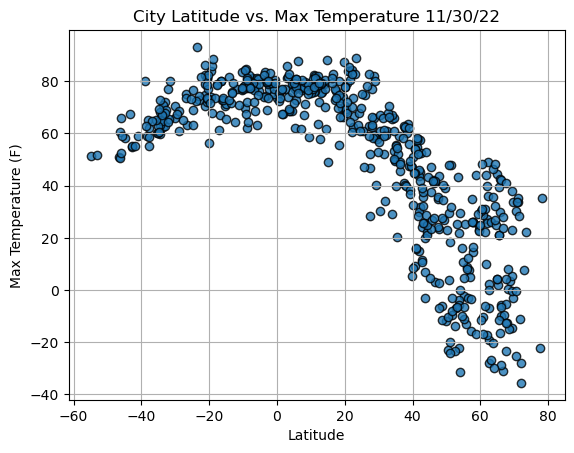

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

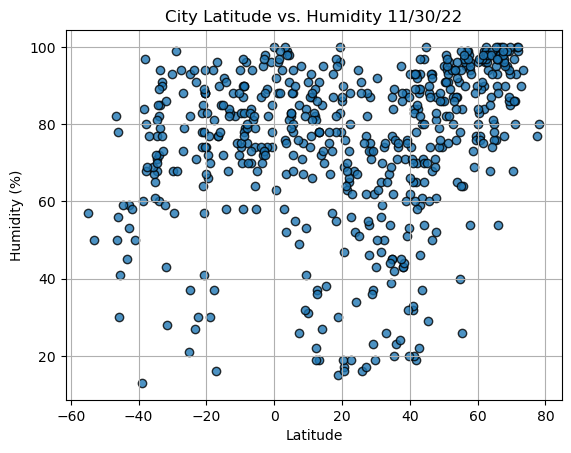

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

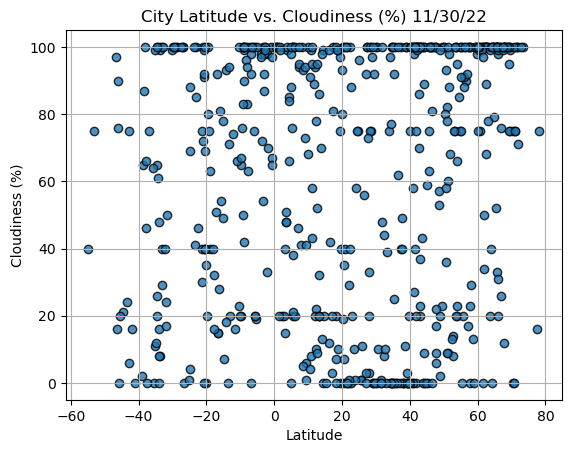

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

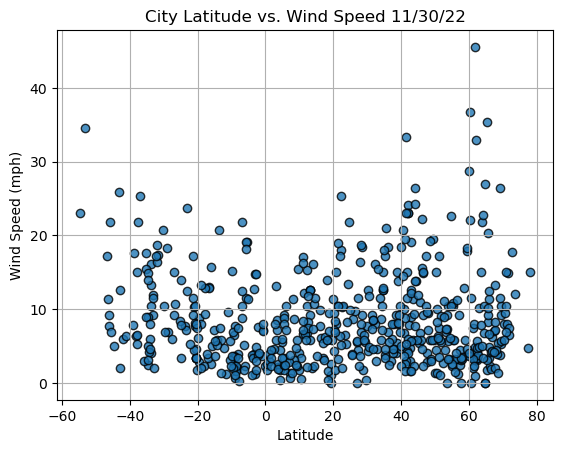

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-11-30 22:08:40
Lat                       71.2906
Lng                     -156.7887
Max Temp                    28.42
Humidity                       93
Cloudiness                    100
Wind Speed                   8.05
Name: 13, dtype: object

In [49]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
565    False
566    False
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ulaangom,MN,2022-11-30 22:12:18,49.9811,92.0667,-11.70,95,100,1.28
1,Andra,RU,2022-11-30 22:12:18,62.5147,65.8878,-6.86,99,89,3.06
2,Huntsville,US,2022-11-30 22:12:18,34.7304,-86.5861,49.82,45,0,12.66
3,Mae Hong Son,TH,2022-11-30 22:12:19,19.3003,97.9685,69.87,96,97,1.10
5,Merritt Island,US,2022-11-30 22:12:20,28.5392,-80.6720,82.00,71,75,18.41


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

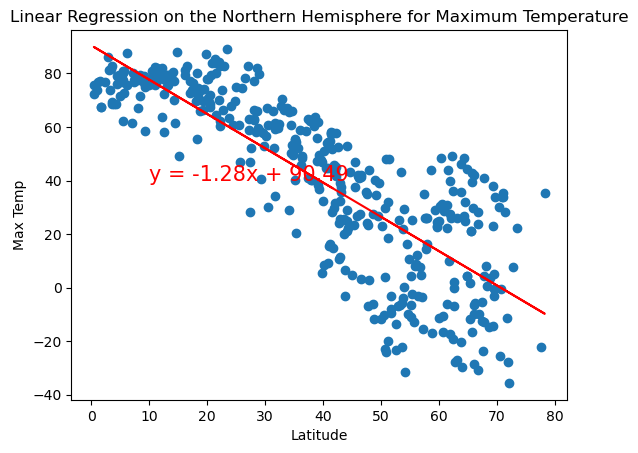

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

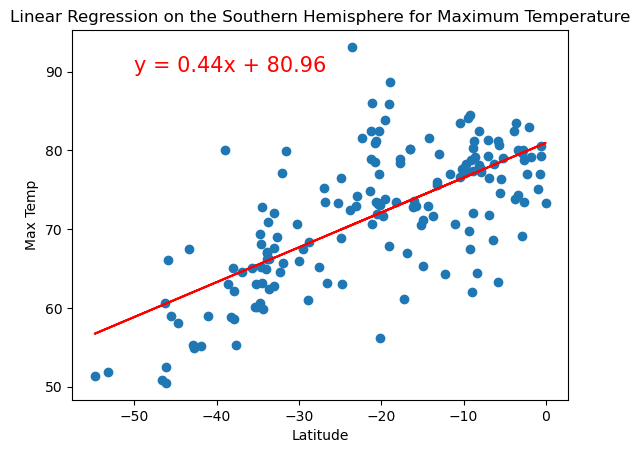

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

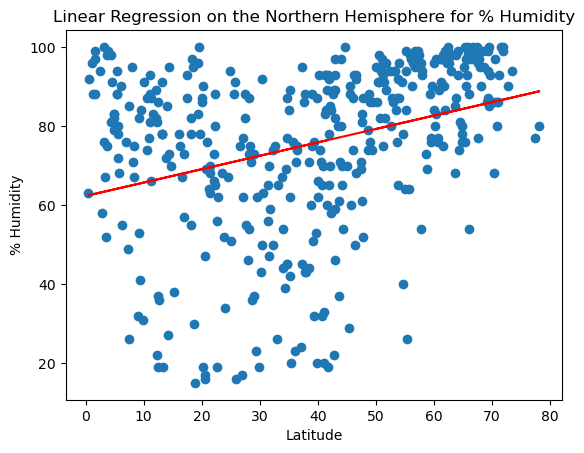

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

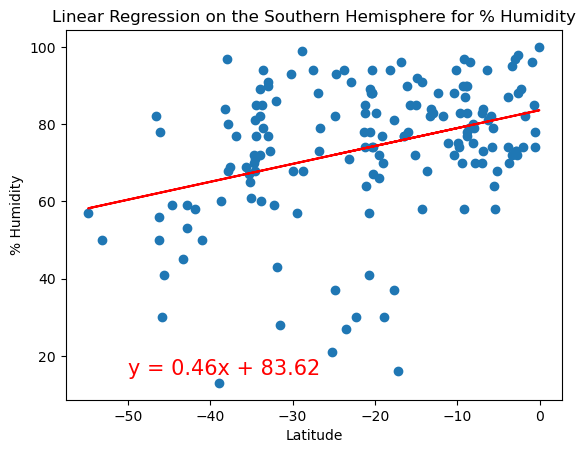

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

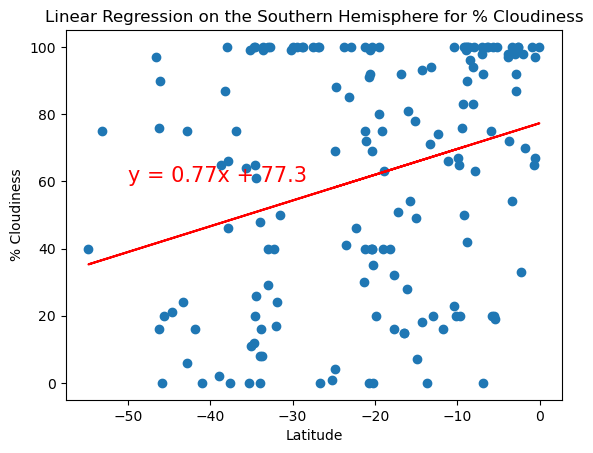

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

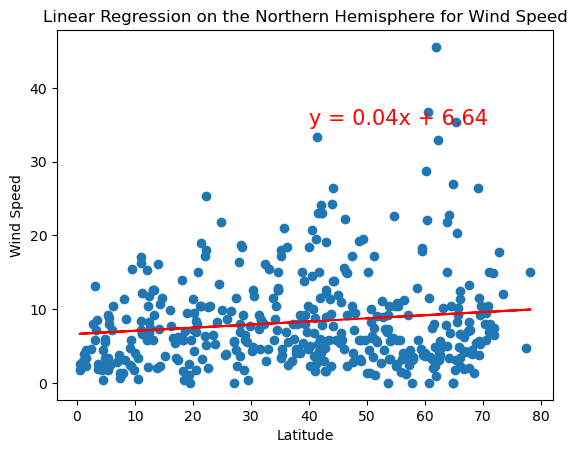

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

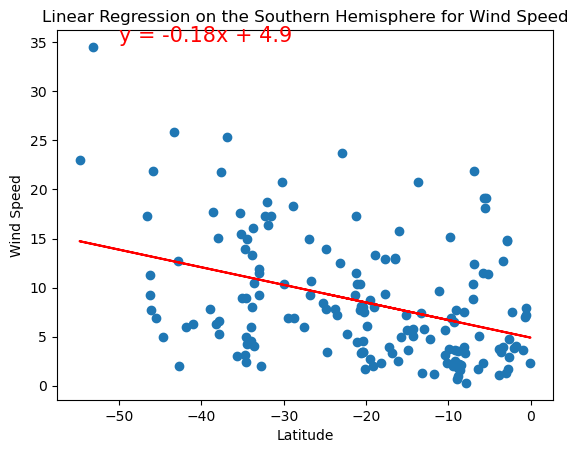

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))